In [4]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
from matplotlib import pyplot as plt

from torchvision import transforms
from torchvision.datasets import MNIST, FashionMNIST, KMNIST, EMNIST
from torch.utils.data import Subset

from utils import plt_image, viz_dataset_sample


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: attempted relative import with no known parent package

In [2]:
mnist_dataset = MNIST(root="~/data/",train=True,download=True,transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3801,))
]))
fashion_dataset = FashionMNIST(root="~/data/",train=True,download=True,transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3801,))
]))
kmnist_dataset = KMNIST(root="~/data/",train=True,download=True,transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3801,))
]))
emnist_dataset = EMNIST(root="~/data/",train=True,split="letters",download=True,transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3801,))
]))

## Visualize MNIST

In [3]:
def plt_image(ax, inp):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = 0.1307
    std = 0.3081
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    ax.imshow(inp[:,:,0], cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


def viz_dataset_sample(ax, dataset, idx=0, model=None, unc_model=None):
    input, target = dataset[idx]
    plt_image(ax, input)
    xlabel = 'Target: %d' % target
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    if unc_model is not None:
        z_mean, z_var = unc_model(input.to(device).unsqueeze(0))
        pred = np.argmax(z_mean[0].detach().cpu().numpy())

        dist_layer = scod.distributions.CategoricalLogitLayer()
        unc = eval_scod(input, unc_model, dist_layer)
        unc = unc.item()
        xlabel += '\nPred: %d\nUnc: %0.3f' % (pred, unc)
    elif model is not None:
        # pred = np.argmax( model(input.unsqueeze(0))[0].detach().cpu().numpy() )
        pred = output(model.to(device), input.to(device), torch.tensor(target))
        xlabel += '\nPred: %d' % pred
    ax.set_xlabel(xlabel)

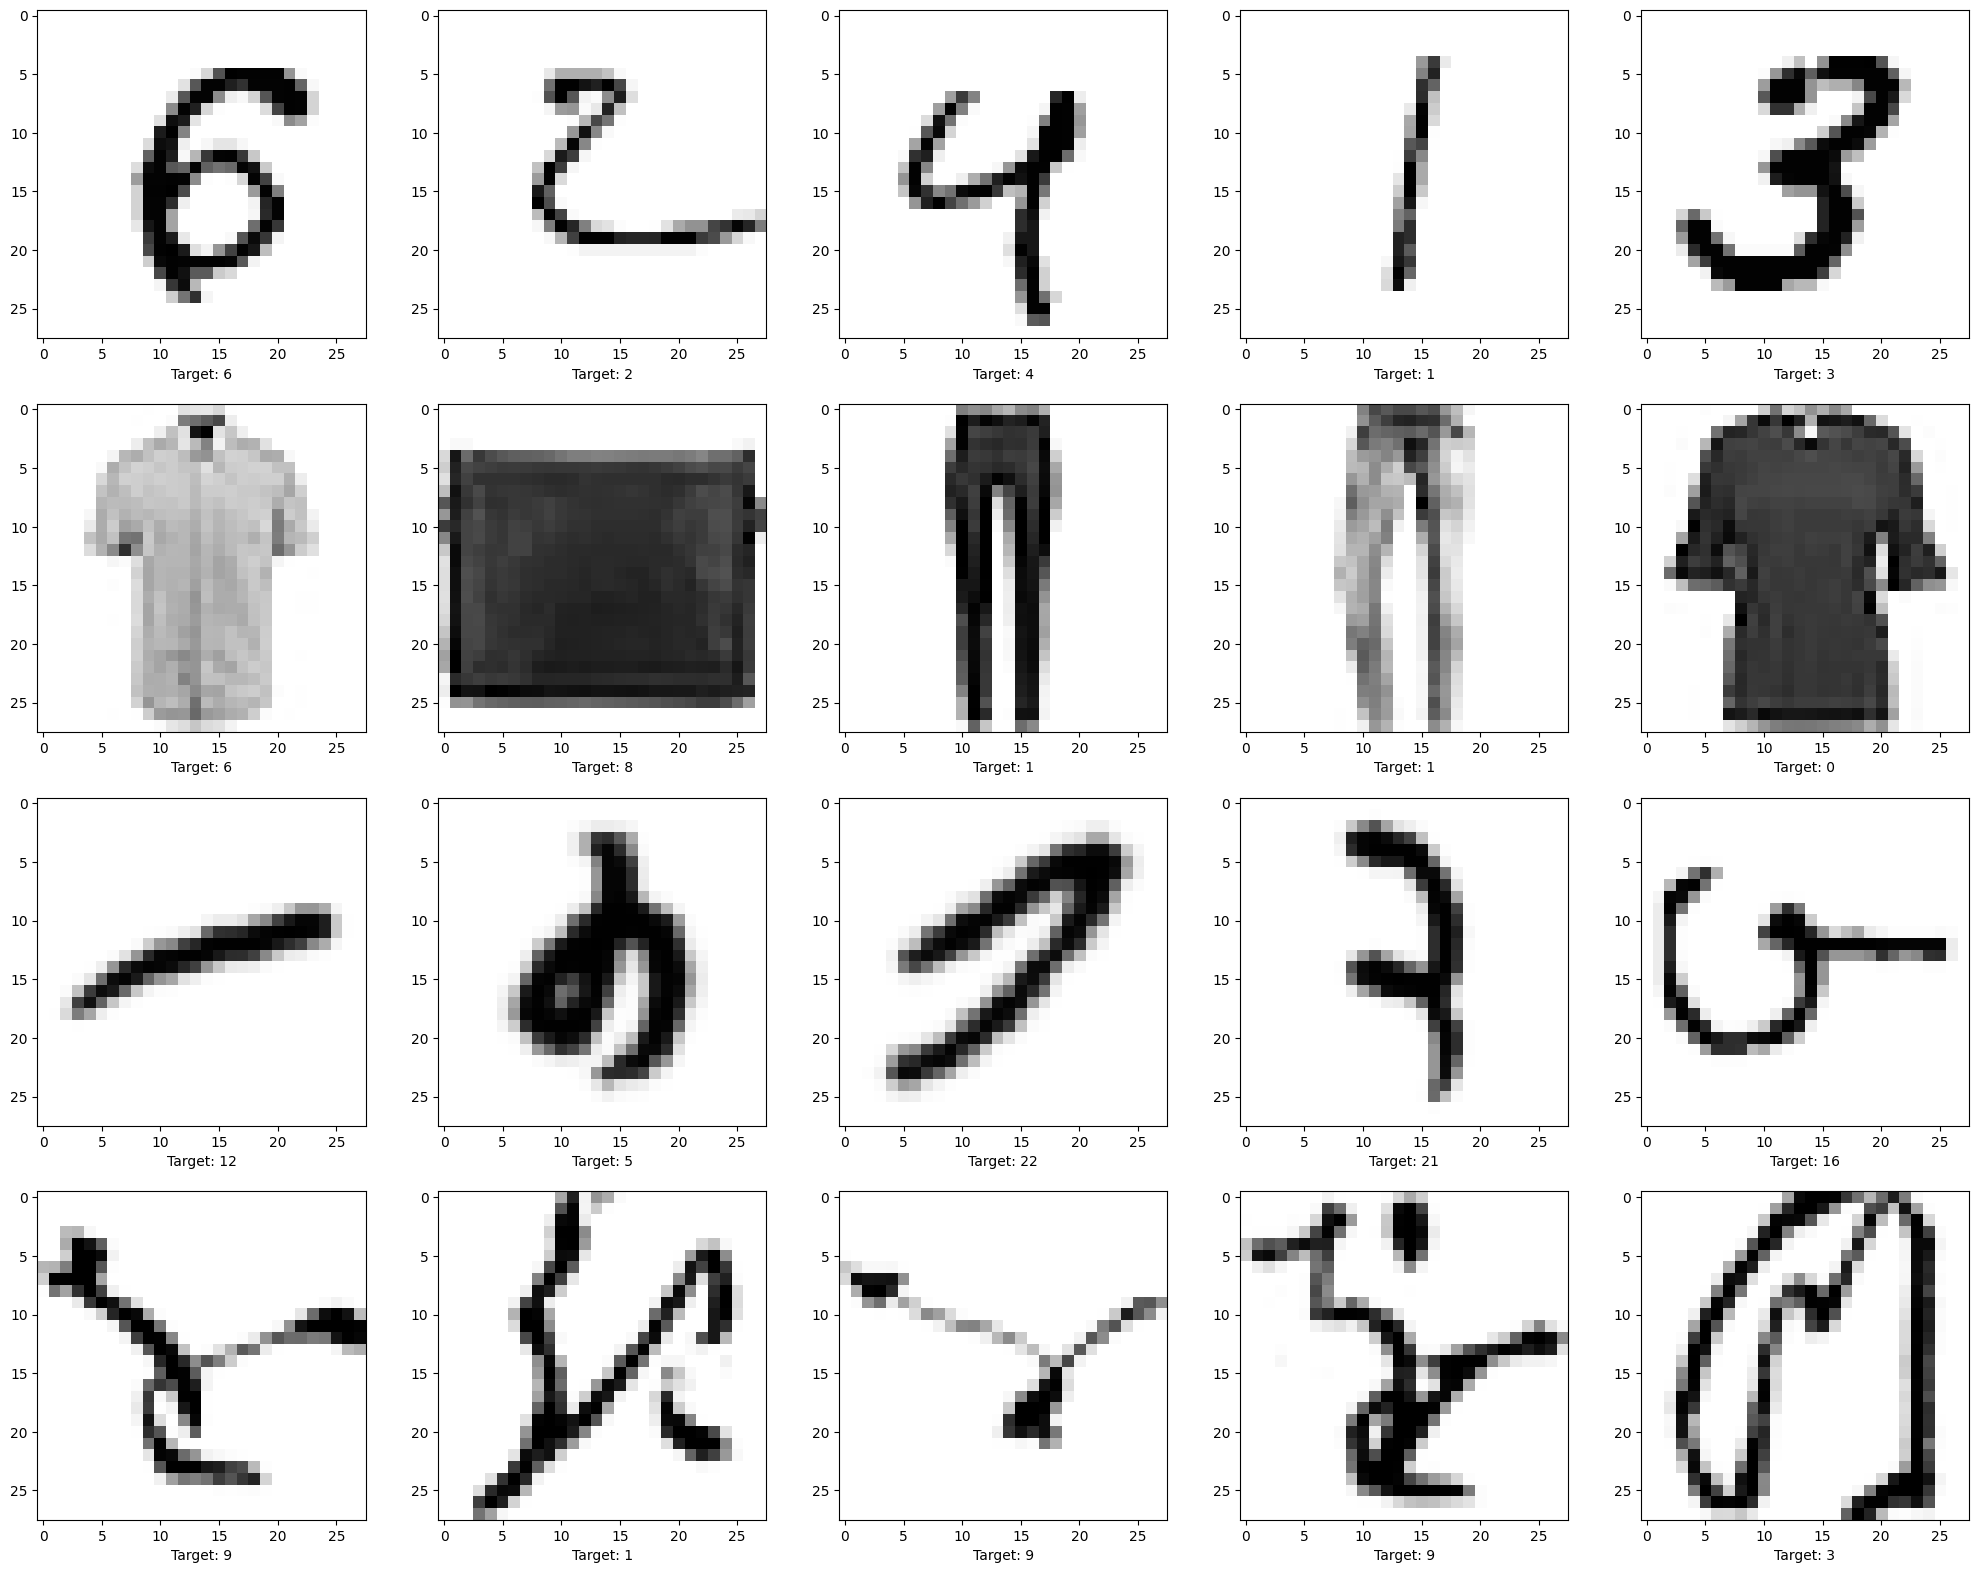

In [4]:
num_plots = 5
datasets_to_viz = [mnist_dataset, fashion_dataset, emnist_dataset, kmnist_dataset]
num_datasets = len(datasets_to_viz)
fig, axes = plt.subplots(num_datasets,num_plots, figsize=[5*num_plots, 5*num_datasets], dpi=100, squeeze=False)
# np.random.seed(seed=42)
for di, dataset in enumerate(datasets_to_viz):
    for j,idx in enumerate(np.random.choice(len(dataset), num_plots)):
        viz_dataset_sample( axes[di][j], dataset, idx )